# Programming Assignment 1
# <span style="font-family: Arial; color: #2e86c1; font-size: 25px;">Exploratory Data Analysis: Spotify Most Streamed Songs 2023</span>

### <span style="font-family: Arial; color: darkslategray;">By: Beanca A. Manaog & Julian Gabrielo B. Sales</span>
### <span style="font-family: Arial; color: darkslategray;">Subject: ECE Electives 1 - Emerging Technologies</span>

<hr style="border: 1px solid #ccc;" />


<span style="color: green; font-weight: bold; font-size: large">Introduction</span>
#### In this assignment, we will perform an exploratory data analysis (EDA) on a dataset containing information about popular tracks from the Most Streamed Spotify Songs 2023. Our goal is to analyze, visualize, and interpret the data to extract meaningful insights.

In [1]:
# Required imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

# Load the dataset with a specified encoding
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

### <span style="color: #2e86c1; font-size: 24px;">1. Overview of Dataset</span>

#### 1.1 <span style="color: #5d6d7e;">How many rows and columns does the dataset contain?</span>

We can have an idea of how large the dataset is by running the code:

In [2]:
print(df.shape)

(953, 24)


<span style="color: #B8860B; font-weight: bold">Insight:</span>
The dataset contains <span style="color: #3498db;">953 rows</span> and <span style="color: #3498db;">24 columns</span>. This gives us an idea of how large and detailed the dataset is, which is important for planning the analysis.

#### 1.2 <span style="color: #5d6d7e;">What are the data types of each column? Are there any missing values?</span>

We can have an idea of what types of data the dataset contains by running the code:

In [3]:
import pandas as pd
from IPython.display import display
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Get data types
data_types = df.dtypes.reset_index()
data_types.columns = ['Column Name', 'Data Type']

# Get missing values
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column Name', 'Missing Values']

# Merge both DataFrames
summary = pd.merge(data_types, missing_values, on='Column Name')

# Define the highlight function
def highlight_missing(row):
    if row['Missing Values'] > 0:
        return ['background-color: red'] * len(row)
    else:
        return ['background-color: lightblue'] * len(row)

# Apply the styling
styled_summary = summary.style.apply(highlight_missing, axis=1)

# Display the styled DataFrame
display(styled_summary)

,Column Name,Data Type,Missing Values
0,track_name,object,0
1,artist(s)_name,object,0
2,artist_count,int64,0
3,released_year,int64,0
4,released_month,int64,0
5,released_day,int64,0
6,in_spotify_playlists,int64,0
7,in_spotify_charts,int64,0
8,streams,object,0
9,in_apple_playlists,int64,0


<span style="color: #B8860B; font-weight: bold">Insight:</span>
The dataset consists of various data types such as integers, floats, and strings. We also find that there are <span style="color: #3498db;">2 columns</span> with missing values, which are in_shazam_charts and key which need further investigation before analysis.

### <span style="color: #2e86c1; font-size: 24px;">2. Basic Descriptive Statistics</span>

#### 2.1 <span style="color: #5d6d7e;"> What are the mean, median, and standard deviation of the streams column?</span>

We can have an idea of what the is mean, median, and standard deviation of the streams column by running the code:

In [4]:
# Convert the 'streams' column to numeric, coercing errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column 
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

# Create a summary DataFrame for display
summary_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Value': [mean_streams, median_streams, std_streams]
})

# Display the header and summary statistics
display(HTML('<h2 style="color: #2e86c1;">Basic Descriptive Statistics</h2>'))
display(summary_df)

,Statistic,Value
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08


<span style="color: #B8860B; font-weight: bold">Insight:</span>

From this output, we can say that the average number of streams (approximately 514,137,400) is significantly higher than the median (around 290,530,900), indicating a positive skew in the data. This suggests that while most tracks have lower stream counts, a few popular tracks drive the average up, resulting in a high standard deviation (approximately 566,856,900) that reflects considerable variability in stream counts. With this, the data may contain outliers, highlighting the need for further analysis to understand the distribution and identify any tracks with exceptionally high or low streams.

#### 2.2 <span style="color: #5d6d7e;">What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?</span>

<span style="color: #5d6d7e;">Plot: Distribution of Released Year</span>

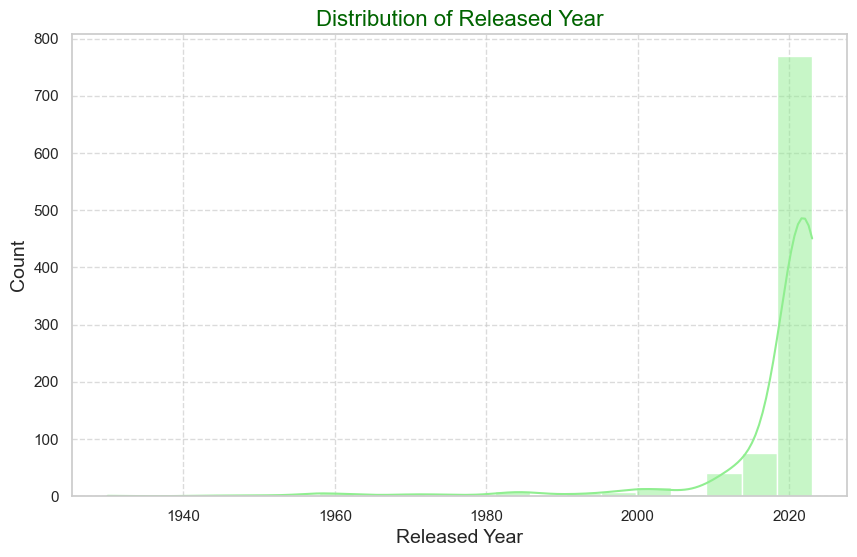

In [5]:
# Set the style for the plot
sns.set(style='whitegrid')

# Plot the distribution of 'released_year'
plt.figure(figsize=(10, 6))
sns.histplot(df['released_year'], bins=20, kde=True, color='lightgreen')

# Add title and labels with improved formatting
plt.title('Distribution of Released Year', fontsize=16, color='darkgreen')
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Enhance grid visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The released year distribution shows clear trends in music production. We can see in the plot that the data set garnered most of its songs from those release in 2010 onwards, spiking in the following years of 2020. Peaks highlight years with significant releases, suggesting impactful moments in the industry, while dips indicate quieter periods. This pattern helps us understand how the spotify users listen to songs that are freshly released.


<span style="color: #5d6d7e;">Plot: Distribution of Artist Count</span>

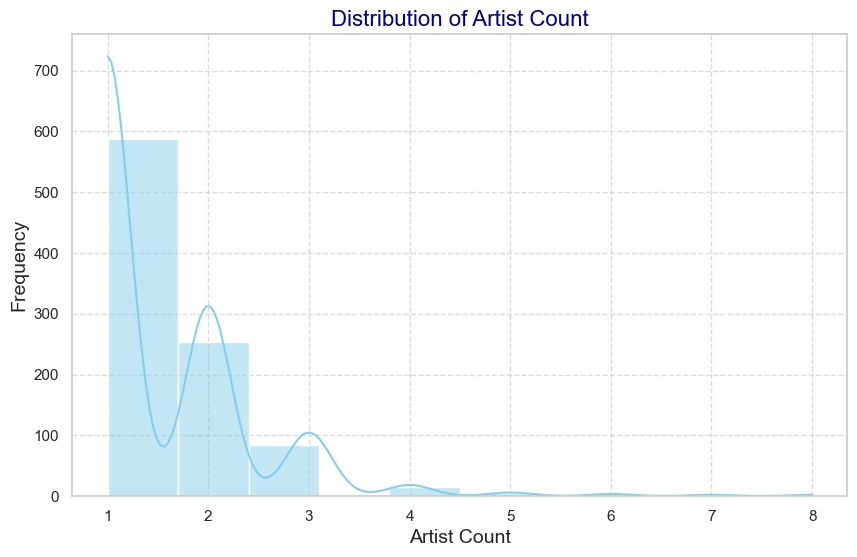

In [6]:
# Plot the distribution of 'artist_count'
plt.figure(figsize=(10, 6))
sns.histplot(df['artist_count'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Artist Count', fontsize=16, color='darkblue')
plt.xlabel('Artist Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The plot suggests that most tracks that are listened to in the dataset are sung solo, meaning listeners choose to play songs that are sung by solo artists. Decreasingly, listeners also listen to songs that are sung by a duo, trio, and groups, respectively. 

### <span style="color: #2e86c1; font-size: 24px;">3. Top Performers</span>

#### 3.1 <span style="color: #5d6d7e;"> What are the track that has the highest number of streams? Display the top 5 most streamed tracks.</span>


We can have an idea of what the top 5 most-streamed tracks of 2023 are by running this code:

In [7]:
# Get the top 5 tracks
top_5_tracks = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)
top_5_tracks.columns = ['Track Name', 'Streams']  # Set column names

# Create a styled HTML table
html_table = top_5_tracks.to_html(index=False, classes='table table-striped')

# Add CSS for styling
css = """
<style>
    .table {
        width: 80%;
        margin: 20px auto;
        border-collapse: collapse;
        font-family: Arial, sans-serif;
    }
    .table th, .table td {
        border: 1px solid #dddddd;
        text-align: left;
        padding: 8px;
    }
    .table th {
        background-color: #2e86c1;
        color: white;
    }
    .table tr:nth-child(even) {
        background-color: #f2f2f2;
    }
</style>
"""

# Display the styled table
display(HTML(css + html_table))

Track Name,Streams
Blinding Lights,3703895074.0
Shape of You,3562543890.0
Someone You Loved,2887241814.0
Dance Monkey,2864791672.0
Sunflower - Spider-Man: Into the Spider-Verse,2808096550.0


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The table reveals that the most streamed song of 2023 in Spotify was Blinding Lights, followed  by Shape of You, Someone You Loved, Dance Monkey, and Sunflower. These songs are the most popular and most-listened to songs on Spotify accounting to its number of streams. 

#### 3.2 <span style="color: #5d6d7e;"> Who are the top 5 most frequent artists based on the number of tracks in the dataset? </span>


We can have an idea of who the top 5 most frequent artists are by running this code:

In [8]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
from IPython.display import display, HTML

# Prepare the top 5 artists DataFrame
top_5_artists = df['artist(s)_name'].value_counts().head(5).reset_index()
top_5_artists.columns = ['Artist Name', 'Track Count']

# Create a styled HTML table
html_table = top_5_artists.to_html(index=False, classes='table table-striped')

# Add CSS for styling
css = """
<style>
    .table {
        width: 80%;
        margin: 20px auto;
        border-collapse: collapse;
        font-family: Arial, sans-serif;
    }
    .table th, .table td {
        border: 1px solid #dddddd;
        text-align: left;
        padding: 10px;
    }
    .table th {
        background-color: #007bff;
        color: white;
        font-size: 16px;
    }
    .table tr:nth-child(even) {
        background-color: #f2f2f2;
    }
    .table tr:hover {
        background-color: #d1ecf1;
    }
</style>
"""

# Display the styled table
display(HTML(css + html_table))

Artist Name,Track Count
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The table reveals that Taylor Swift bagged the most songs to be included in the most-listened to list in Spotify in the year 2023. This is because she released an album with 22 tracks, securing her top spot. She was followed by The Weeknd who released a live album the same year, Bad Bunny, SZA, who went on tour that year, and Harry Styles. 

### <span style="color: #2e86c1; font-size: 24px;">4. Temporal Trends</span>

#### 4.1 <span style="color: #5d6d7e;"> Analyze the trends in number of tracks released over time. Plot the number of tracks released per year.

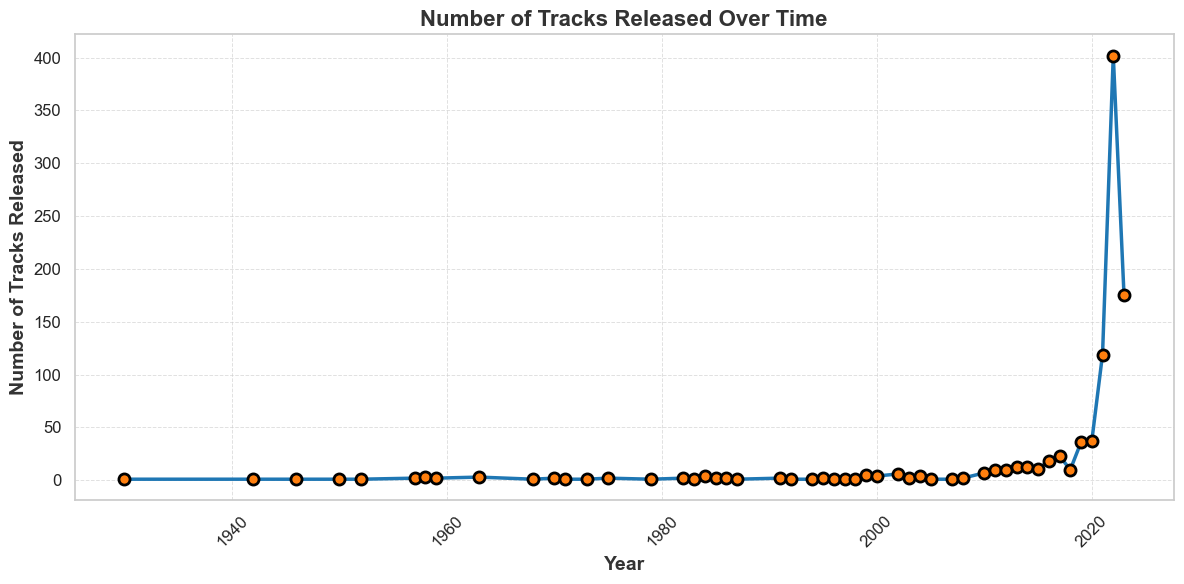

In [9]:
# Group the data by year and count the number of tracks released each year
tracks_per_year = df.groupby('released_year').size().reset_index(name='track_count')


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year['released_year'], tracks_per_year['track_count'], 
         marker='o', linestyle='-', linewidth=2.5, markersize=8, color='#1f77b4', 
         markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='black')


plt.title('Number of Tracks Released Over Time', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Number of Tracks Released', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()



<span style="color: #B8860B; font-weight: bold">Insight:</span>

The number of tracks released stayed pretty low and steady from the 1940s until about 2000, then slowly started to grow. After 2020, there’s a huge spike, with over 400 tracks released in a year, likely because of more digital music and independent artists. After that peak, there’s a small drop, which could mean things are leveling out.

#### 4.2 <span style="color: #5d6d7e;"> Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

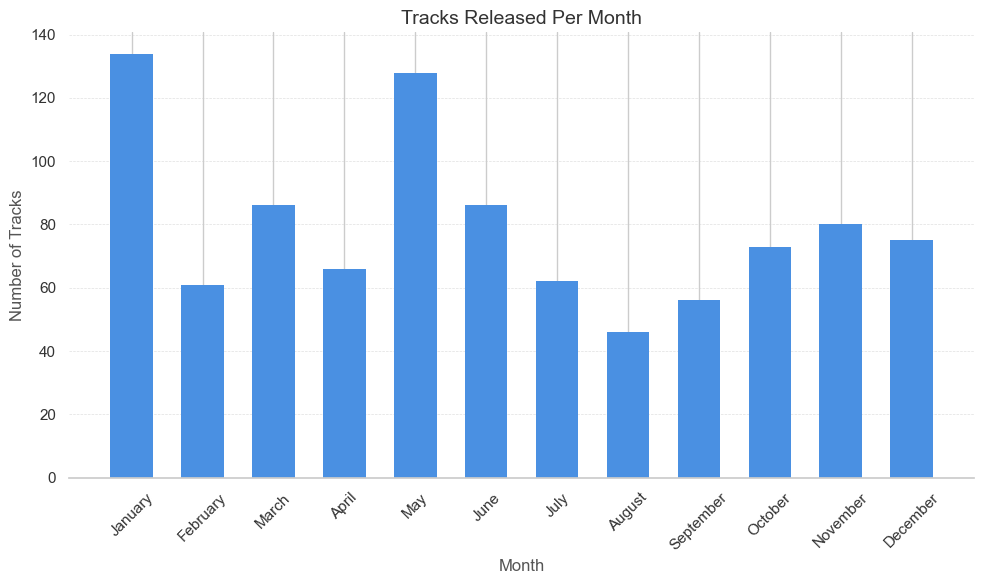

The month with the most releases is January with 134 tracks.


In [10]:
# Group by the released month and count the number of tracks released
tracks_per_month = df.groupby('released_month').size().reset_index(name='track_count')

# Map month numbers to month names for better readability
tracks_per_month['released_month'] = tracks_per_month['released_month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Create the plot
plt.figure(figsize=(10, 6))


plt.bar(tracks_per_month['released_month'], tracks_per_month['track_count'], 
        color='#4a90e2', edgecolor='none', width=0.6)


plt.title('Tracks Released Per Month', fontsize=14, color='#333')
plt.xlabel('Month', fontsize=12, color='#555')
plt.ylabel('Number of Tracks', fontsize=12, color='#555')
plt.xticks(rotation=45, fontsize=11, color='#333')
plt.yticks(fontsize=11, color='#333')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.show()

# Identify the month with the most releases
most_releases_month = tracks_per_month.loc[tracks_per_month['track_count'].idxmax()]
print(f"The month with the most releases is {most_releases_month['released_month']} with {most_releases_month['track_count']} tracks.")


<span style="color: #B8860B; font-weight: bold">Insight:</span>

From the chat above, the month with the most releases is January with 134 tracks. With that, it shows that January and May have the most track releases, with over 120 tracks each. August has the fewest releases, while the rest of the months show fairly consistent numbers. Overall, there’s a peak at the beginning and middle of the year, followed by a dip around August.

### <span style="color: #2e86c1; font-size: 24px;">5. Genre and Music Characteristics</span>

#### 5.1  <span style="color: #5d6d7e;"> Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

In [11]:
# Convert relevant columns to numeric, coercing errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')

# Drop any rows where conversion failed and NaNs are present
df_cleaned = df.dropna(subset=['streams', 'bpm', 'danceability_%', 'energy_%'])

# Compute the correlation matrix on the cleaned DataFrame
correlation_data = df_cleaned[['streams', 'bpm', 'danceability_%', 'energy_%']]
correlation_matrix = correlation_data.corr()

# Display the correlation matrix as a styled HTML table
from IPython.display import display, HTML

html_table = correlation_matrix.to_html(classes='table')
css = """
<style>
    .table {
        width: 60%;
        margin: 20px auto;
        border-collapse: collapse;
        font-family: Arial, sans-serif;
        background-color: #f7f7f7;
    }
    .table th {
        background-color: #e0e0e0;
        font-weight: bold;
        font-size: 14px;
        color: #333;
    }
    .table td {
        background-color: #f9f9f9;
        color: #1a1a1a;
    }
    .table th, .table td {
        border: 1px solid #ccc;
        text-align: center;
        padding: 8px;
    }
    .table tr:nth-child(even) td {
        background-color: #f1f1f1;
    }
    .table tr:hover td {
        background-color: #e9e9e9;
    }
</style>
"""
display(HTML(css + html_table))

,streams,bpm,danceability_%,energy_%
streams,1.000000,-0.002438,-0.105457,-0.026051
bpm,-0.002438,1.000000,-0.147630,0.025932
danceability_%,-0.105457,-0.147630,1.000000,0.198485
energy_%,-0.026051,0.025932,0.198485,1.000000


<span style="color: #5d6d7e;">Plot: Correlation between Streams and Musical Attributes</span>

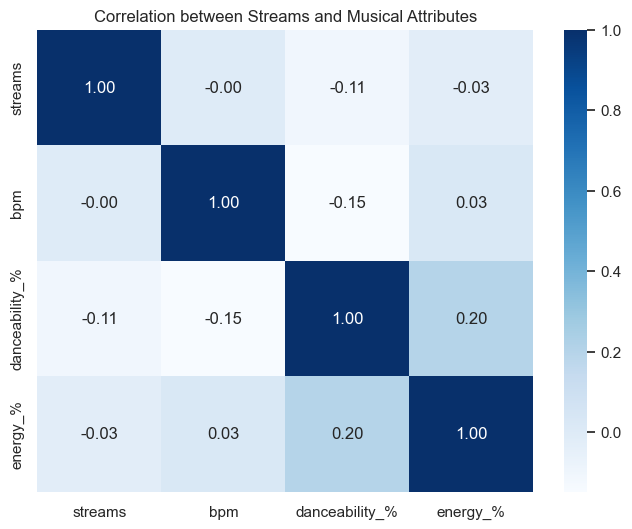

The musical attribute that influences streams the most is 'danceability_%' with a correlation of -0.11.


In [12]:
# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation between Streams and Musical Attributes')
plt.show()

# Identify the attribute with the highest absolute correlation to streams (ignoring streams itself)
correlations = correlation_matrix['streams'].drop('streams')
max_correlation_value = correlations.abs().max()  # Use the absolute value to find the largest correlation
max_correlation_attribute = correlations.abs().idxmax()

# Check if the maximum correlation is greater than a small threshold (like 0.1)
threshold = 0.1
if max_correlation_value > threshold:
    print(f"The musical attribute that influences streams the most is '{max_correlation_attribute}' with a correlation of {correlations[max_correlation_attribute]:.2f}.")
else:
    print("None of the musical attributes have a significant influence on streams.")

<span style="color: #B8860B; font-weight: bold">Insight:</span>

From the correlation heatmap, none of the musical attributes (bpm, danceability_%, energy_%) seem to strongly influence streams, as all correlations are close to zero. The attribute with the highest negative correlation is danceability_% (-0.11), though this is still quite weak. In short, the data suggests that streams aren't strongly affected by bpm, danceability, or energy.

#### 5.2 <span style="color: #5d6d7e;"> Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

#### Correlation between danceability_% and energy_%:

In [13]:
# Compute the correlation between danceability_% and energy_%
correlation_value = df['danceability_%'].corr(df['energy_%'])

# Display the correlation value
print(f"Correlation between Danceability and Energy: {correlation_value:.2f}")

Correlation between Danceability and Energy: 0.20


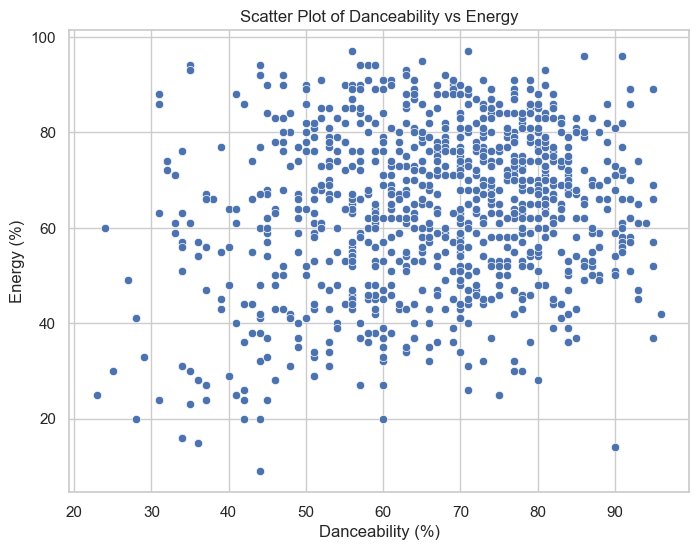

In [14]:
# Visualize the correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=df)
plt.title('Scatter Plot of Danceability vs Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.show()


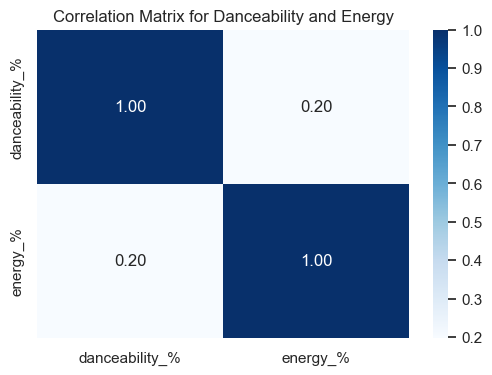

In [15]:
# Visualize the correlation matrix 
correlation_matrix = df[['danceability_%', 'energy_%']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix for Danceability and Energy')
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The correlation matrix shows a weak positive correlation of 0.20 between *danceability_%* and *energy_%*. This means that as the energy level of a song increases, its danceability slightly increases, but the relationship isn't strong. In simple terms, energy and danceability aren't closely tied together, so a high-energy song won't always be more danceable.

#### Correlation between valence_% and acousticness_%:

In [16]:
# Compute the correlation between valence_% and acousticness_%
correlation_value = df['valence_%'].corr(df['acousticness_%'])

# Display the correlation value
print(f"Correlation between Valence and Acousticness: {correlation_value:.2f}")

Correlation between Valence and Acousticness: -0.08


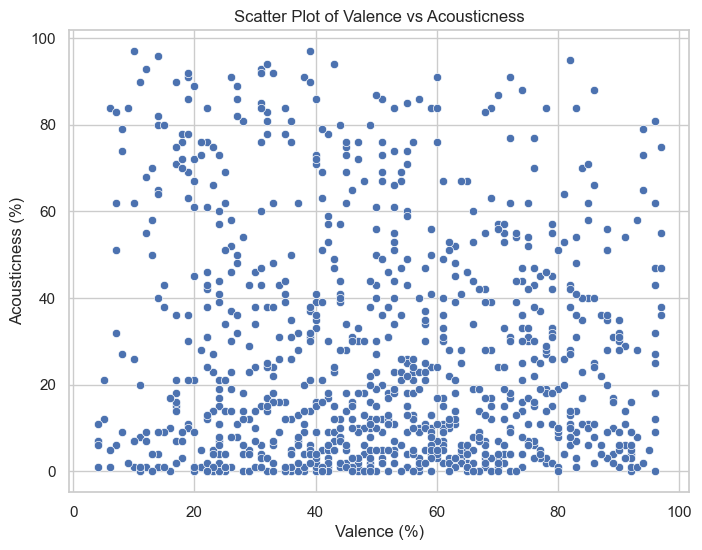

In [17]:
# Visualize the correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='valence_%', y='acousticness_%', data=df)
plt.title('Scatter Plot of Valence vs Acousticness')
plt.xlabel('Valence (%)')
plt.ylabel('Acousticness (%)')
plt.show()

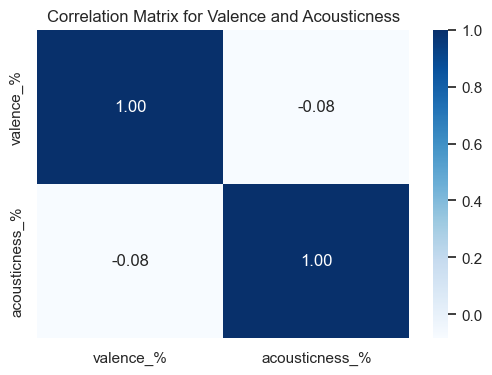

In [18]:
# Visualize the correlation matrix (for additional context)
correlation_matrix = df[['valence_%', 'acousticness_%']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix for Valence and Acousticness')
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The correlation matrix shows a very weak negative correlation of -0.08 between *valence_%* (happiness or positivity) and *acousticness_%*. This means that there is almost no relationship between how positive a song feels and how acoustic it is. In simple terms, whether a song is more acoustic or not doesn't really affect its overall mood or positivity level.

### <span style="color: #2e86c1; font-size: 24px;">6. Platform Popularity</span>

<span style="color: #5d6d7e;"> How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

In [19]:
# Convert columns to numeric and coercing errors
playlist_cols = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

# Summarize the number of tracks in Spotify Playlists, Spotify Charts, and Apple Playlists
playlist_comparison = df[playlist_cols].sum()

# Convert the Series to DataFrame for HTML representation
playlist_comparison_df = playlist_comparison.to_frame(name='Number of Tracks').reset_index()
playlist_comparison_df.columns = ['Platform', 'Number of Tracks']  # Rename columns for clarity

# Create HTML table from DataFrame
html_table = playlist_comparison_df.to_html(classes='table', index=False)

# Add minimalistic CSS for styling
css = """
<style>
    .table {
        width: 60%;
        margin: 20px auto;
        border-collapse: collapse;
        font-family: Arial, sans-serif;
        background-color: #f7f7f7;
    }
    .table th {
        background-color: #e0e0e0;
        font-weight: bold;
        font-size: 14px;
        color: #333;
    }
    .table td {
        background-color: #f9f9f9;
        color: #1a1a1a;
    }
    .table th, .table td {
        border: 1px solid #ccc;
        text-align: center;
        padding: 8px;
    }
    .table tr:nth-child(even) td {
        background-color: #f1f1f1;
    }
    .table tr:hover td {
        background-color: #e9e9e9;
    }
</style>
"""

# Display the table with the custom styling
display(HTML(css + html_table))

Platform,Number of Tracks
in_spotify_playlists,4955719
in_spotify_charts,11445
in_apple_playlists,64625


<span style="color: #5d6d7e;">Plot: Comparison of Tracks in Spotify Playlists, Spotify Charts, and Apple Playlists</span>

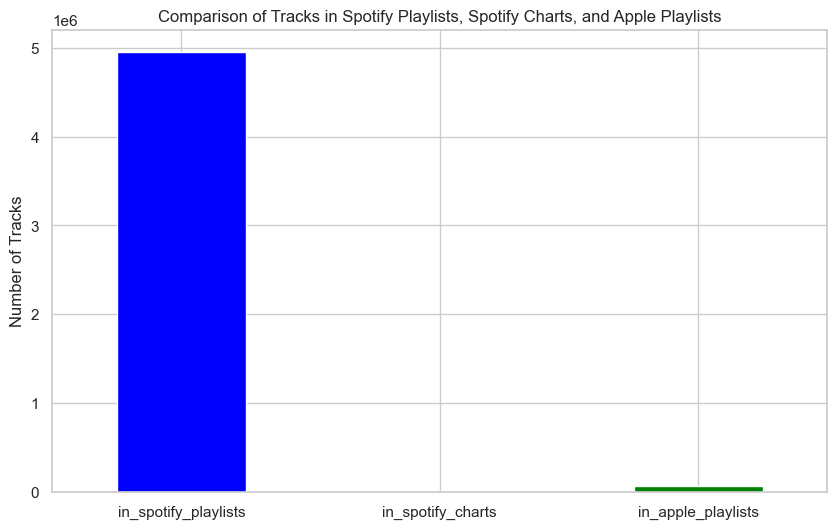

In [20]:
# Bar chart for the number of tracks across platforms
plt.figure(figsize=(10, 6))
playlist_comparison.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Comparison of Tracks in Spotify Playlists, Spotify Charts, and Apple Playlists')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=0)
plt.show()

<span style="color: #5d6d7e;">Platform that seems to favor most popular tracks</span>

In [21]:
# Convert necessary columns to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0)

# Define "most popular tracks" as those in the top 10% based on streams
top_10_percent_cutoff = df['streams'].quantile(0.90)

# Create a new dataframe containing only the top 10% most-streamed tracks
most_popular_tracks = df[df['streams'] >= top_10_percent_cutoff]

# Print the cutoff for the top 10% and the number of most popular tracks
print(f"Top 10% cutoff for streams: {top_10_percent_cutoff}")
print(f"Number of most popular tracks: {len(most_popular_tracks)}")


Top 10% cutoff for streams: 1302107250.0
Number of most popular tracks: 96


C:\Users\Beanca\AppData\Local\Temp\ipykernel_13964\617218303.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_platform_sums.index, y=popular_platform_sums.values, palette="coolwarm")


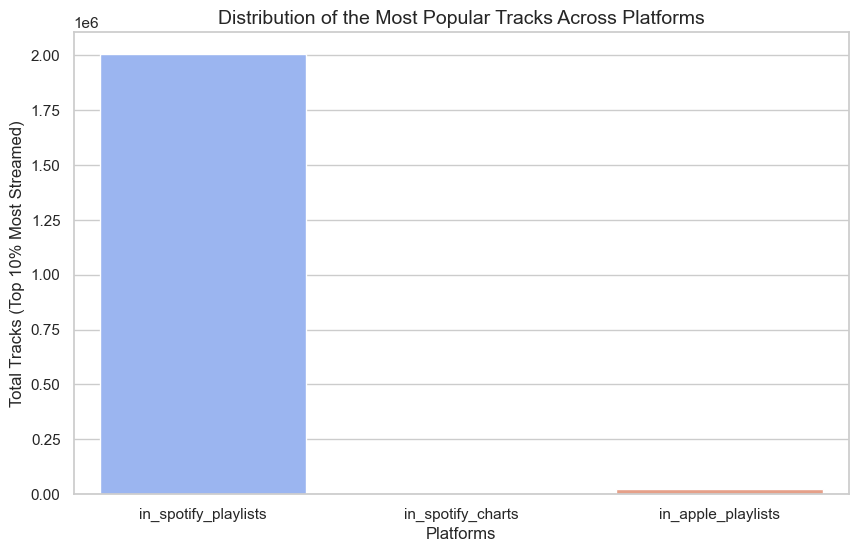

In [22]:
# Summarize how many of the most popular tracks appear on each platform
popular_platform_sums = most_popular_tracks[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()

# Create a bar plot to compare the distribution of the most popular tracks across platforms
plt.figure(figsize=(10,6))

# Plot the total appearances of the most popular tracks on each platform
sns.barplot(x=popular_platform_sums.index, y=popular_platform_sums.values, palette="coolwarm")

# Add labels and title
plt.title('Distribution of the Most Popular Tracks Across Platforms', fontsize=14)
plt.ylabel('Total Tracks (Top 10% Most Streamed)', fontsize=12)
plt.xlabel('Platforms', fontsize=12)

# Show the plot
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The bar chart shows that <span style="color: #3498db;">*Spotify Playlists*</span> have a significantly higher number of tracks having <span style="color: #3498db;">4,955,719</span> tracks compared to *Spotify Charts* and *Apple Playlists*, which have a much smaller number. It can be seen that Spotify playlists overwhelmingly favor the most popular tracks compared to Spotify charts and Apple playlists. Almost all of the top 10% most-streamed tracks appear in Spotify playlists, while very few are featured in the other platforms. This suggests that Spotify heavily promotes popular music through its playlists more than its charts or Apple’s playlists.

### <span style="color: #2e86c1; font-size: 24px;">7. Advanced Analysis</span>

#### 7.1 <span style="color: #5d6d7e;"> Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs Minor) 


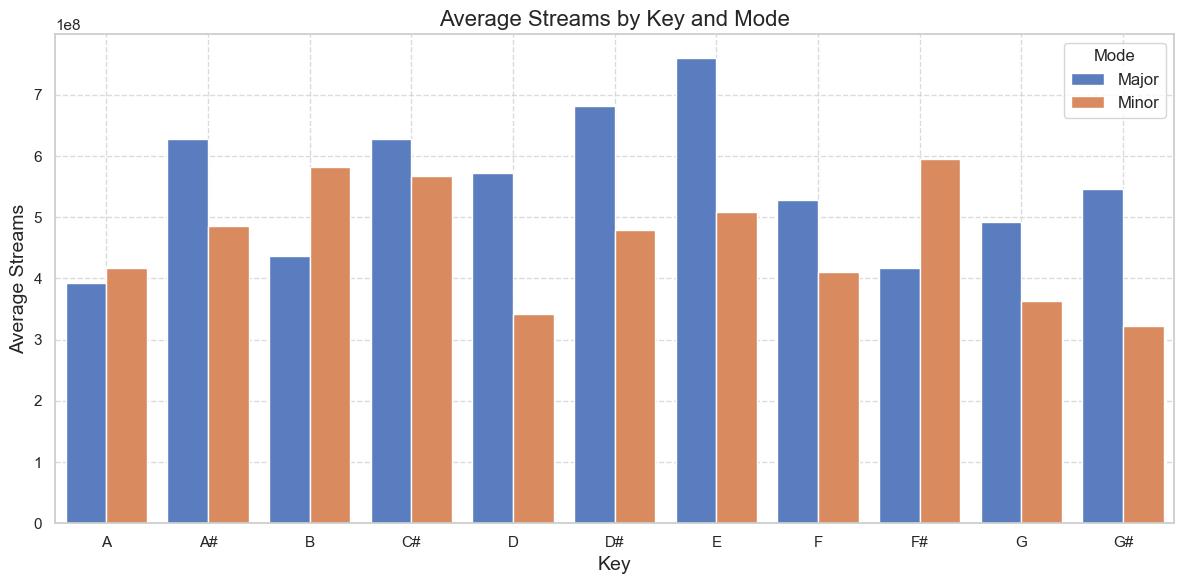

In [23]:
# Group by key and mode, aggregating streams data
key_mode_analysis = df.groupby(['key', 'mode'])['streams'].agg(['mean', 'sum', 'count']).reset_index()

# Create a bar plot for average streams by key and mode
plt.figure(figsize=(12, 6))
sns.barplot(data=key_mode_analysis, x='key', y='mean', hue='mode', palette='muted')
plt.title('Average Streams by Key and Mode', fontsize=16)
plt.xlabel('Key', fontsize=14)
plt.ylabel('Average Streams', fontsize=14)
plt.legend(title='Mode', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

E major and F sharp minor tracks are racking up the most streams, showing they really click with listeners. On the flip side, A major and G sharp minor seem to be falling flat with the lowest streams. This suggests that the choice of key can play a big role in how well a track performs. Artists and producers might want to pay attention to these trends to create music that resonates more with their audience.

#### 7.2 <span style="color: #5d6d7e;"> Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts. 


<Figure size 1200x600 with 0 Axes>

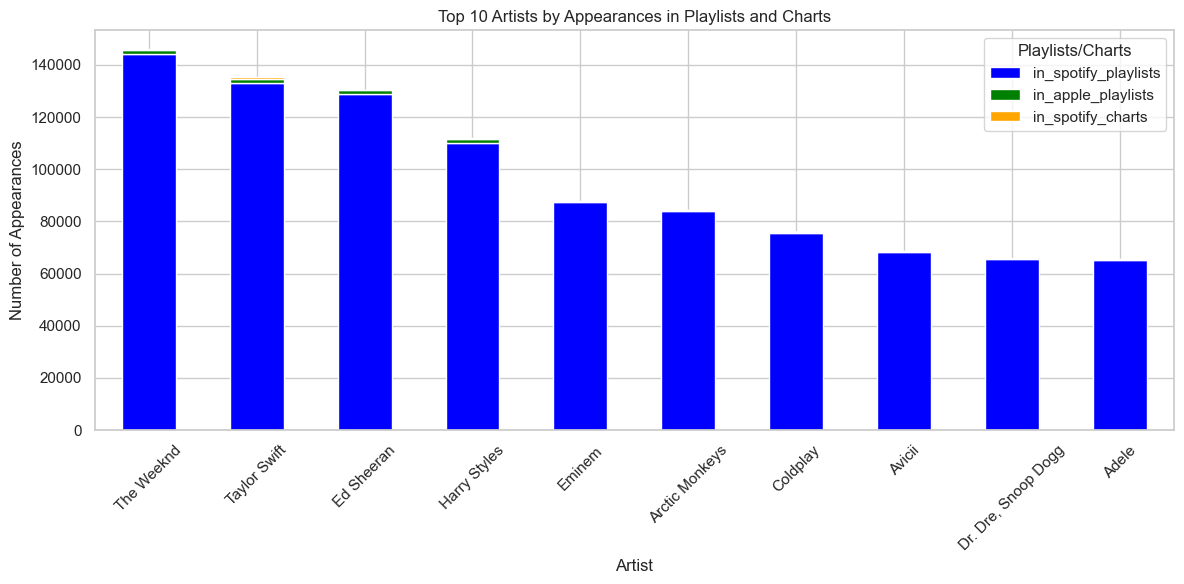

In [24]:
# Group the data by the correct artist column and sum the number of playlists and charts
artist_playlist_chart_counts = df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_spotify_charts']].sum().reset_index()

# Sort the artists by their total appearances in playlists or charts
artist_playlist_chart_counts['total_appearances'] = artist_playlist_chart_counts[['in_spotify_playlists', 'in_apple_playlists', 'in_spotify_charts']].sum(axis=1)
top_artists = artist_playlist_chart_counts.sort_values(by='total_appearances', ascending=False).head(10)

# Plot the top 10 artists and their appearances in playlists and charts
plt.figure(figsize=(12, 6))
top_artists.set_index('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_spotify_charts']].plot(kind='bar', stacked=True, color=['blue', 'green', 'orange'], figsize=(12, 6))
plt.title('Top 10 Artists by Appearances in Playlists and Charts')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.legend(title='Playlists/Charts')
plt.tight_layout()
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

This chart highlights the top 10 artists by their appearances on Spotify and Apple platforms, with The Weeknd, Taylor Swift, and Ed Sheeran leading the list. Most artists come from pop, rap, or rock genres, which consistently dominate playlists and charts. Additionally, the data shows that Spotify playlists generally offer more exposure than Apple playlists or Spotify charts, with only minor differences in appearances.